In [ ]:
#zip extraction
import zipfile
import os

file_path = "data.zip"

# Create a directory to extract the files
extract_path = 'NEU_Metal_Surface_Defects_Data'
os.makedirs(extract_path, exist_ok=True)

# Open and extract the ZIP file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the contents of the folder
print("Contents of the folder:")
print(os.listdir(extract_path))

Contents of the folder:
['NEU Metal Surface Defects Data']


In [ ]:
#augmentation
import os
import shutil
import cv2
import albumentations as A
import matplotlib.pyplot as plt

transform = A.Compose([
    A.RandomCrop(width=150, height=150),
    A.HorizontalFlip(p=0.8),
    A.RandomBrightnessContrast(p=0.8),
])

for folder in os.listdir("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train"):
  output_dir = f"/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/{folder}"
  os.makedirs(output_dir, exist_ok=True)
  for i in os.listdir(f"/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train/{folder}"):
    img = cv2.imread(f"/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train/{folder}/{i}")
    if img is None:
        print(f"Image {i} not found.")
        continue
    else:
        fin_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        transformed = transform(image = fin_image)
        transformed_image = transformed["image"]
        transformed_image_bgr = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
        img_normalized = cv2.normalize(transformed_image_bgr, None, 0, 1.0,cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        shutil.move(f"/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train/{folder}/{i}", f"/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/{folder}/original_{i}")


    output_path = os.path.join(output_dir, f"transformed_{i}")
    status = cv2.imwrite(output_path, transformed_image_bgr)
    if status:
      print(f"Transformed image saved to {output_path}")
    else:
      print(f"Failed to save transformed image to {output_path}")



Transformed image saved to /content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Patches/transformed_Pa_153.bmp
Transformed image saved to /content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Patches/transformed_Pa_6.bmp
Transformed image saved to /content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Patches/transformed_Pa_87.bmp
Transformed image saved to /content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Patches/transformed_Pa_297.bmp
Transformed image saved to /content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Patches/transformed_Pa_143.bmp
Transformed image saved to /content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Patches/transformed_Pa_30.bmp
Transformed image saved to /content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Patches/transformed_

In [ ]:
#imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


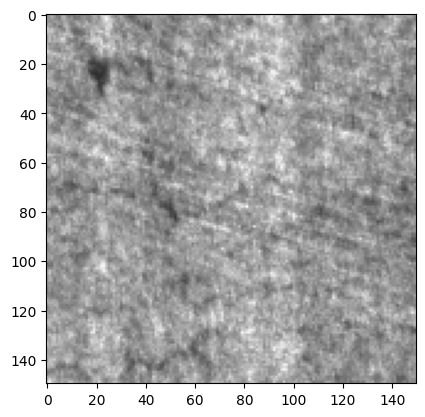

In [ ]:
img = image.load_img("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Crazing/transformed_Cr_122.bmp")
plt.imshow(img)

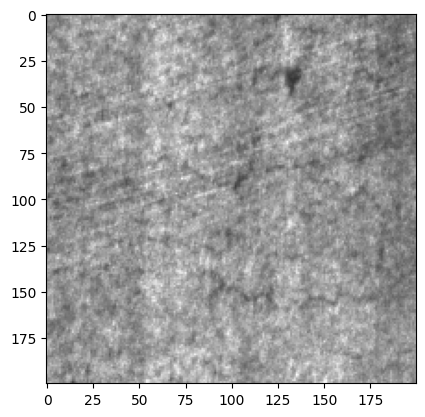

In [ ]:
img = image.load_img("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented/Crazing/original_Cr_122.bmp")
plt.imshow(img)

In [ ]:
#rescale
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
#data-flow
train_dataset = train.flow_from_directory("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/train-augmented",
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = "categorical")
validation_dataset = validation.flow_from_directory("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/valid",
                                        target_size = (200,200),
                                        batch_size = 32,
                                        class_mode = "categorical")

Found 3312 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [ ]:
#custom_model_lite
model = Sequential([

    #First layer of Convolution and Max Pooling
    Conv2D(32, (3,3), activation = "ReLU", input_shape =(200,200,3)),
    MaxPooling2D((2,2)),


    #Second Layer of Convolution and max Pooling
    Conv2D(32,(3,3), activation = "ReLU"),
    MaxPooling2D((2,2)),

    #Flatten the feature map
    Flatten(),
    # Dropout(0.5),
    Dense(64, activation= "ReLU"),
    Dense(6, activation = "softmax")


 ])

In [ ]:
#custom_model_final
model = Sequential([

    # First layer of Convolution and Max Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),

    # Second layer of Convolution and Max Pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third layer of Convolution and Max Pooling
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Fourth layer of Convolution and Max Pooling
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the feature map
    Flatten(),

    # Dense layer
    Dense(128, activation='relu'),
    Dropout(0.3),  # Adding Dropout to prevent overfitting

    # Output layer
    Dense(6, activation='softmax')
])

In [ ]:
#custom_model_compilation
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 23, 23, 128)      

In [ ]:
#custom_model_training
model_fit = model.fit(train_dataset, validation_data = validation_dataset, epochs = 10)

Epoch 1/10
104/104 [==============================] - 306s 3s/step - loss: 0.2951 - accuracy: 0.8952 - val_loss: 0.0691 - val_accuracy: 0.9722
Epoch 2/10
104/104 [==============================] - 297s 3s/step - loss: 0.2491 - accuracy: 0.9155 - val_loss: 0.1293 - val_accuracy: 0.9444
Epoch 3/10
104/104 [==============================] - 293s 3s/step - loss: 0.2159 - accuracy: 0.9239 - val_loss: 0.0404 - val_accuracy: 0.9861
Epoch 4/10
104/104 [==============================] - 293s 3s/step - loss: 0.2404 - accuracy: 0.9155 - val_loss: 0.1666 - val_accuracy: 0.9306
Epoch 5/10
104/104 [==============================] - 295s 3s/step - loss: 0.2373 - accuracy: 0.9209 - val_loss: 0.0819 - val_accuracy: 0.9722
Epoch 6/10
104/104 [==============================] - 297s 3s/step - loss: 0.2661 - accuracy: 0.9127 - val_loss: 0.0641 - val_accuracy: 0.9861
Epoch 7/10
104/104 [==============================] - 293s 3s/step - loss: 0.2706 - accuracy: 0.9055 - val_loss: 0.1711 - val_accuracy: 0.9583

In [ ]:
model.save("custom_model_aug_2.keras")

Found 72 images belonging to 6 classes.
3/3 [==============================] - 2s 455ms/step - loss: 0.2746 - accuracy: 0.9306
Test accuracy: 0.93
3/3 [==============================] - 2s 458ms/step


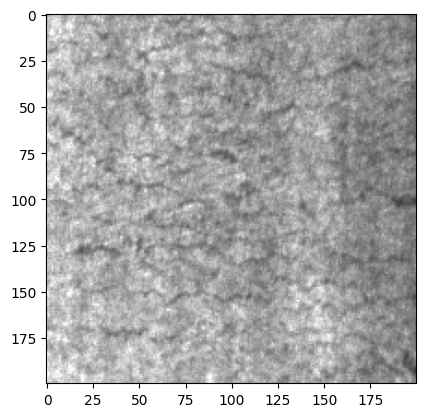

Predicted class: 5, Probability: 1.00


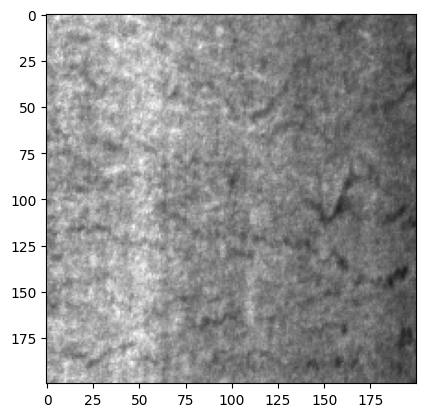

Predicted class: 1, Probability: 0.91


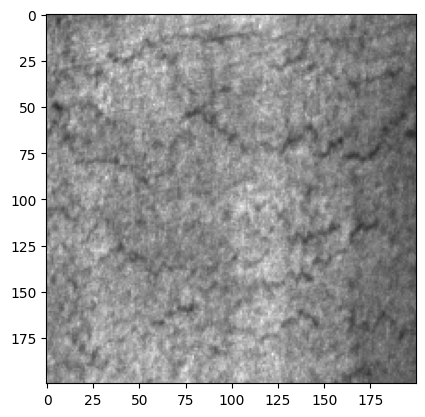

Predicted class: 2, Probability: 1.00


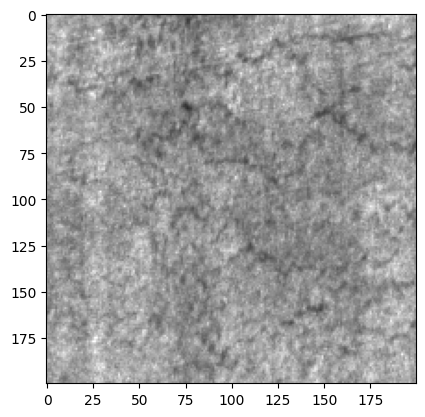

Predicted class: 3, Probability: 0.91


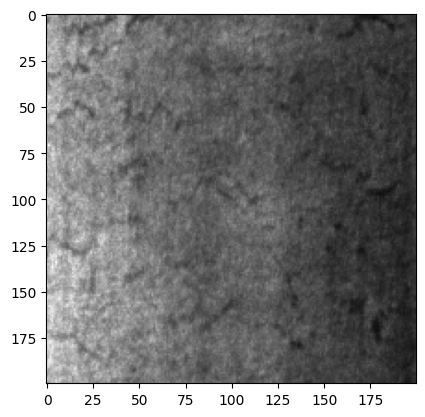

Predicted class: 1, Probability: 0.98


In [ ]:
#custom_model_testing
test = ImageDataGenerator(rescale=1./255)

# Load the test dataset
test_dataset = test.flow_from_directory("/content/NEU_Metal_Surface_Defects_Data/NEU Metal Surface Defects Data/test",
                                        target_size=(200,200),
                                        batch_size=32,
                                        class_mode="categorical")

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")

# Make predictions on test dataset
predictions = model.predict(test_dataset)

# Print predictions for a few test images
for i in range(5):
    img_path = test_dataset.filepaths[i]
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    prediction = predictions[i]
    predicted_class = np.argmax(prediction)
    print(f"Predicted class: {predicted_class}, Probability: {prediction[predicted_class]:.2f}")

In [ ]:
#vgg16_model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in vgg_model.layers:
    layer.trainable = False  # Freeze the layers

# Add custom top layers for classification
x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Assuming 6 classes
vgg_model = Model(inputs=vgg_model.input, outputs=predictions)


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
#vgg_model_compilation
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#inception_model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in inception_model.layers:
    layer.trainable = False  # Freeze the layers

# Add custom top layers for classification
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Assuming 6 classes
inception_model = Model(inputs=inception_model.input, outputs=predictions)

87910968/87910968 [==============================] - 4s 0us/step


In [ ]:
#inception_model_compilation
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#vgg_model_training
vgg_model.fit(train_dataset, validation_data=validation_dataset)

104/104 [==============================] - 1735s 17s/step - loss: 1.0039 - accuracy: 0.7820 - val_loss: 0.4168 - val_accuracy: 0.9861


In [ ]:
#inception_model_training
inception_model.fit(train_dataset, validation_data=validation_dataset)

104/104 [==============================] - 344s 3s/step - loss: 0.2693 - accuracy: 0.9236 - val_loss: 0.0096 - val_accuracy: 1.0000


In [ ]:
#pre-built_models_save
vgg_model.save("vgg_model.keras")
inception_model.save("inception_model.keras")

In [ ]:
#pre-built_models_testing
test_loss_vgg, test_acc_vgg = vgg_model.evaluate(test_dataset)
print(f"VGG Test accuracy: {test_acc_vgg:.2f}")

test_loss_inception, test_acc_inception = inception_model.evaluate(test_dataset)
print(f"Inception Test accuracy: {test_acc_inception:.2f}")

3/3 [==============================] - 34s 9s/step - loss: 0.5251 - accuracy: 0.9167
VGG Test accuracy: 0.92
3/3 [==============================] - 8s 2s/step - loss: 0.0371 - accuracy: 0.9861
Inception Test accuracy: 0.99
